Task 4.10 - Part 1C

This script contains the following points:

1. Importing libraries and data
2. Determining number of unique values in columns
3. Checking current price range frequencies
4. Creating data dictionary and bar charts for department_id
5. Comparing ordering habits by customer loyalty status with crosstabs and bar charts 
6. Comparing order frequency by age category with crosstabs and bar charts
7. Comparing order frequency by family status & family size with crosstabs and bar charts
8. Comparing average spending by age category with crosstabs and bar charts
9. Comparing average spending by family status & family size with crosstabs and bar charts
10. Comparing order frequency by income range with crosstabs and bar charts
11. Comparing average spending by income range with crosstabs and bar charts

1. Importing libraries and data 

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import data
path = r'C:\Users\polly\Documents\Instacart Basket Analysis'
df_ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all_final.pkl'))  
df_departs = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = 0) 

In [3]:
# Check shape of dataframe
df_ords_prods_all.shape

(30964564, 34)

In [4]:
# Remove max column display default
pd.options.display.max_columns = None

In [5]:
# Check output of dataframe
df_ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_day_new,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,number_of_dependents,fam_status,income,region,age_range,income_range,family_size
0,2539329,1,1,2,8,-1.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Young adult,Below average income,Large family
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Young adult,Below average income,Large family
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Young adult,Below average income,Large family
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Young adult,Below average income,Large family
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Young adult,Below average income,Large family


In [6]:
# Check statistics of dataframe
df_ords_prods_all.describe()

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price,median_days_since_prior_order,age,number_of_dependents,income
count,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,30964564.0,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.095969e+07,3.096456e+07,3.096456e+07,30964564.0,3.096456e+07,3.096456e+07,3.096456e+07
mean,1.710317e+06,1.029284e+05,1.783414e+01,2.741397e+00,1.341098e+01,NaN,2.559850e+04,8.363038e+00,6.061019e-01,6.450490e+01,9.922365e+00,7.578646e+00,3.442569e+01,1.021500e+01,NaN,4.946803e+01,1.501819e+00,9.967587e+04
std,9.873785e+05,5.947061e+04,1.763442e+01,2.089254e+00,4.248845e+00,0.0,1.408096e+04,7.135399e+00,4.886127e-01,4.841812e+01,6.282441e+00,4.109990e+00,2.489504e+01,7.988674e+01,0.0,1.848528e+01,1.118896e+00,4.314187e+04
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-1.0,1.000000e+00,1.000000e+00,0.000000e+00,-1.280000e+02,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,-1.0,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.554120e+05,5.140900e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.0,1.354400e+04,3.000000e+00,0.000000e+00,2.400000e+01,4.000000e+00,4.200000e+00,1.400000e+01,7.392889e+00,6.0,3.300000e+01,1.000000e+00,6.729200e+04
50%,1.710404e+06,1.025860e+05,1.200000e+01,3.000000e+00,1.300000e+01,7.0,2.528800e+04,6.000000e+00,1.000000e+00,7.900000e+01,9.000000e+00,7.400000e+00,2.800000e+01,7.825143e+00,7.0,4.900000e+01,2.000000e+00,9.676500e+04
75%,2.565206e+06,1.543870e+05,2.500000e+01,5.000000e+00,1.600000e+01,14.0,3.794700e+04,1.100000e+01,1.000000e+00,1.000000e+02,1.600000e+01,1.130000e+01,4.800000e+01,8.249597e+00,11.0,6.500000e+01,3.000000e+00,1.281020e+05
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,30.0,4.968800e+04,1.450000e+02,1.000000e+00,1.270000e+02,2.100000e+01,2.500000e+01,9.900000e+01,1.500694e+04,30.0,8.100000e+01,3.000000e+00,5.939010e+05


2. Determining number of unique values in columns

In [7]:
# Find number of unique values in each column
n = df_ords_prods_all.nunique(axis = 0)

In [8]:
# Print unique values
n

order_id                         3064375
user_id                           162631
order_number                          99
orders_day_of_week                     7
order_time_of_day                     24
days_since_prior_order                32
product_id                         49628
add_to_cart_order                    145
reordered                              2
product_name                       49630
aisle_id                             134
department_id                         21
prices                               240
price_range_loc                        3
busiest_day                            3
busiest_day_new                        3
busiest_period_of_day                  3
max_order                             95
loyalty_flag                           3
average_price                     117106
spending_flag                          2
median_days_since_prior_order         63
order_frequency_flag                   3
gender                                 2
state           

3. Check current price range frequencies

In [9]:
# Check current price_range frequencies
df_ords_prods_all['price_range_loc'].value_counts(dropna = False)

Mid-range product     20891771
Low-range product      9674840
High-range product      397953
Name: price_range_loc, dtype: int64

4. Creating data dictionary and bar charts for departments

In [10]:
# Print df_departs dataframe
df_departs

,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [11]:
# Create data dictionary for 'department_id'
data_dict = df_departs.to_dict('index')

In [12]:
# Check output of data_dict
data_dict

{1: {'department': 'frozen'},
 2: {'department': 'other'},
 3: {'department': 'bakery'},
 4: {'department': 'produce'},
 5: {'department': 'alcohol'},
 6: {'department': 'international'},
 7: {'department': 'beverages'},
 8: {'department': 'pets'},
 9: {'department': 'dry goods pasta'},
 10: {'department': 'bulk'},
 11: {'department': 'personal care'},
 12: {'department': 'meat seafood'},
 13: {'department': 'pantry'},
 14: {'department': 'breakfast'},
 15: {'department': 'canned goods'},
 16: {'department': 'dairy eggs'},
 17: {'department': 'household'},
 18: {'department': 'babies'},
 19: {'department': 'snacks'},
 20: {'department': 'deli'},
 21: {'department': 'missing'}}

In [13]:
# Map department names in data dictionary to df_ords_prods_all dataframe
df_ords_prods_all['department_name'] = df_ords_prods_all['department_id'].map(data_dict)

In [14]:
# Check output
df_ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_day_new,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,number_of_dependents,fam_status,income,region,age_range,income_range,family_size,department_name
0,2539329,1,1,2,8,-1.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Young adult,Below average income,Large family,{'department': 'beverages'}
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Young adult,Below average income,Large family,{'department': 'beverages'}
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Young adult,Below average income,Large family,{'department': 'beverages'}
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Young adult,Below average income,Large family,{'department': 'beverages'}
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Young adult,Below average income,Large family,{'department': 'beverages'}


[Text(0, 0, '33451'),
 Text(0, 0, '34411'),
 Text(0, 0, '64768'),
 Text(0, 0, '93060'),
 Text(0, 0, '144627'),
 Text(0, 0, '255991'),
 Text(0, 0, '410392'),
 Text(0, 0, '424306'),
 Text(0, 0, '670850'),
 Text(0, 0, '674781'),
 Text(0, 0, '699857'),
 Text(0, 0, '822136'),
 Text(0, 0, '1.00383e+06'),
 Text(0, 0, '1.01207e+06'),
 Text(0, 0, '1.12083e+06'),
 Text(0, 0, '1.7827e+06'),
 Text(0, 0, '2.12173e+06'),
 Text(0, 0, '2.5719e+06'),
 Text(0, 0, '2.76641e+06'),
 Text(0, 0, '5.17718e+06'),
 Text(0, 0, '9.07927e+06')]

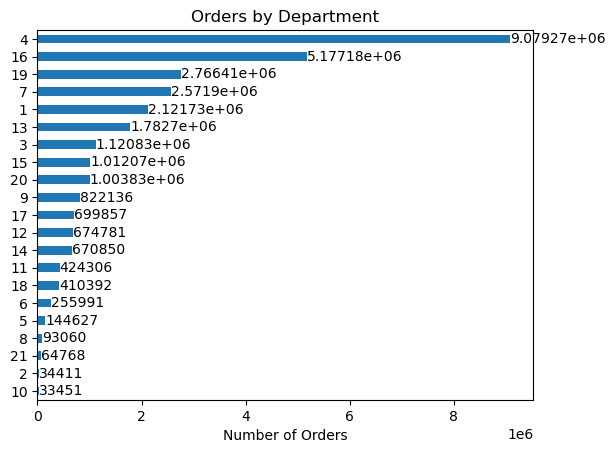

In [15]:
# Create frequency bar chart for department_id
bar_1 = df_ords_prods_all['department_id'].value_counts().sort_values().plot.barh()
plt.xlabel('Number of Orders')
plt.title('Orders by Department')
bar_1.bar_label(bar_1.containers[0], label_type='edge')

In [16]:
# Save 'bar_1' object to file
bar_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barh_depart_id_orders.png'))

Text(0.5, 1.0, 'Orders by Department')

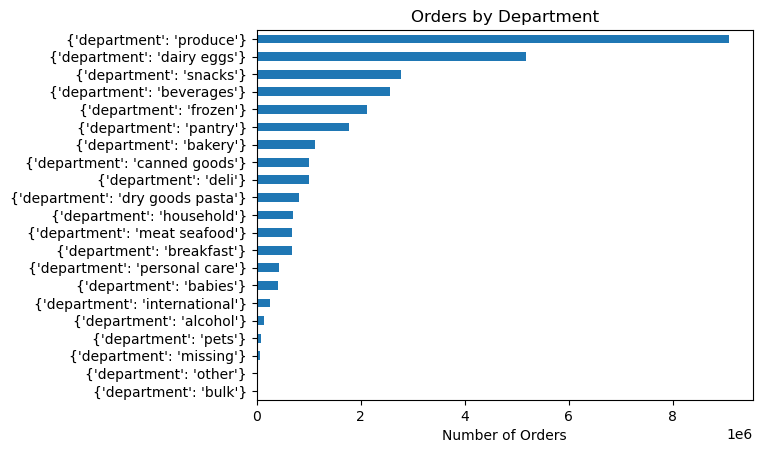

In [17]:
# Create frequency bar chart for department_name
bar_2 = df_ords_prods_all['department_name'].value_counts().sort_values().plot.barh()
plt.xlabel('Number of Orders')
plt.title('Orders by Department')

In [18]:
# Save 'bar_2' object to file
bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barh_depart_name_orders.png'))

5. Comparing customer loyalty status and ordering habits

In [23]:
# Create crosstab between 'loyalty_flag' and 'spending_flag' columns
crosstab_1 = pd.crosstab(df_ords_prods_all['loyalty_flag'], df_ords_prods_all['spending_flag'], dropna = False)

In [24]:
# Sort crosstab_1 by 'High Spender'
crosstab_1 = crosstab_1.sort_values(by = 'High spender',ascending = False)

In [36]:
# Print sorted crosstab_1
crosstab_1

spending_flag,High spender,Low spender
loyalty_flag,,
Regular customer,302814,15573962
Loyal customer,216600,10067493
New customer,84011,4719684


In [39]:
# Print sorted crosstab_1
pd.options.display.float_format = '{:,}'.format

In [ ]:
df_ords_prods_all = df_ords_prods_all.style.format('{:,}')

In [34]:
# Print sorted crosstab_1
crosstab_1 = '{:,}'.format()

IndexError: Replacement index 0 out of range for positional args tuple

In [21]:
# Sort crosstab_1 by 'High Spender'
crosstab_1 = crosstab_1.sort_values(by = 'High spender',ascending = True)

[Text(0, 0, '33451'),
 Text(0, 0, '34411'),
 Text(0, 0, '64768'),
 Text(0, 0, '93060'),
 Text(0, 0, '144627'),
 Text(0, 0, '255991'),
 Text(0, 0, '410392'),
 Text(0, 0, '424306'),
 Text(0, 0, '670850'),
 Text(0, 0, '674781'),
 Text(0, 0, '699857'),
 Text(0, 0, '822136'),
 Text(0, 0, '1.00383e+06'),
 Text(0, 0, '1.01207e+06'),
 Text(0, 0, '1.12083e+06'),
 Text(0, 0, '1.7827e+06'),
 Text(0, 0, '2.12173e+06'),
 Text(0, 0, '2.5719e+06'),
 Text(0, 0, '2.76641e+06'),
 Text(0, 0, '5.17718e+06'),
 Text(0, 0, '9.07927e+06')]

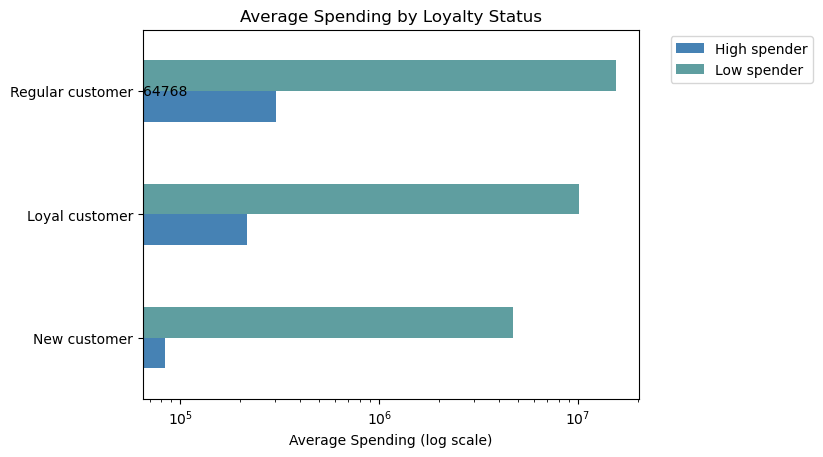

In [22]:
# Create bar chart of crosstab_1
bar_3 = crosstab_1.plot(kind = 'barh', logx = True, color = ['steelblue', 'cadetblue'])
plt.xlabel('Average Spending (log scale)')
plt.ylabel('')
plt.title('Average Spending by Loyalty Status')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc = 'upper left', ncol = 1)
bar_3.bar_label(bar_1.containers[0], label_type='edge')

In [21]:
# Save 'bar_3' object to file
bar_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barh_loyalty_spending.png'))

In [22]:
# Create percentage crosstab between 'loyalty_flag' and 'spending_flag'
crosstab_1_percent = pd.crosstab(df_ords_prods_all['loyalty_flag'], df_ords_prods_all['spending_flag'], normalize = 'index', dropna = False).round(4)*100

In [23]:
# Sort crosstab_1 by 'High Spender'
crosstab_1_percent = crosstab_1_percent.sort_values(by = 'High spender',ascending = False)

In [24]:
# Print sorted crosstab_1_percent
crosstab_1_percent

spending_flag,High spender,Low spender
loyalty_flag,,
Loyal customer,2.11,97.89
Regular customer,1.91,98.09
New customer,1.75,98.25


In [30]:
# Sort crosstab_1 by 'High Spender'
crosstab_1_percent = crosstab_1_percent.sort_values(by = 'High spender',ascending = True)

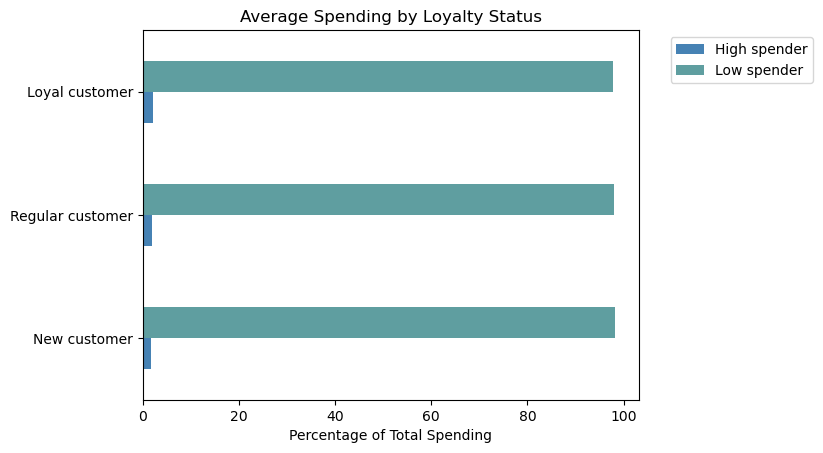

In [28]:
# Create bar chart of crosstab_1_percent
bar_4 = crosstab_1_percent.plot(kind = 'barh', color = ['steelblue', 'cadetblue'])
plt.xlabel('Percentage of Total Spending')
plt.ylabel('')
plt.title('Average Spending by Loyalty Status')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc = 'upper left', ncol = 1)

In [31]:
# Save 'bar_4' object to file
bar_4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barh_loyalty_percent_spending.png'))

In [32]:
# Create crosstab between 'loyalty_flag' and 'order_frequency_flag' columns
crosstab_2 = pd.crosstab(df_ords_prods_all['loyalty_flag'], df_ords_prods_all['order_frequency_flag'], dropna = False)

In [33]:
# Print crosstab_2 
crosstab_2

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
loyalty_flag,,,
Loyal customer,10281575,0,2518
New customer,1660212,1526642,1616841
Regular customer,10267117,660775,4948884


In [34]:
# Sort crosstab_2 by 'Frequent customer'
crosstab_2 = crosstab_2.sort_values(by = 'Frequent customer',ascending = False)

In [35]:
# Print sorted crosstab_2 
crosstab_2

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
loyalty_flag,,,
Loyal customer,10281575,0,2518
Regular customer,10267117,660775,4948884
New customer,1660212,1526642,1616841


In [36]:
# Sort crosstab_2 by 'Frequent customer'
crosstab_2 = crosstab_2.sort_values(by = 'Frequent customer',ascending = True)

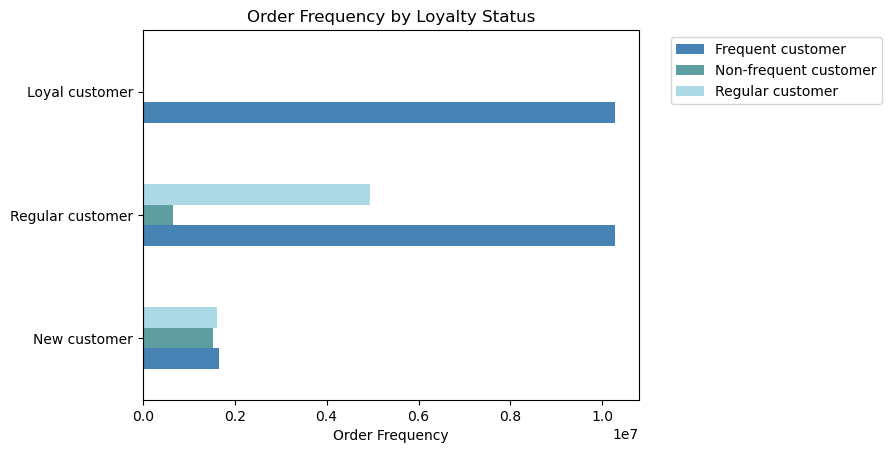

In [37]:
# Create bar chart of crosstab_2
bar_5 = crosstab_2.plot(kind = 'barh', color = ['steelblue', 'cadetblue', 'lightblue'])
plt.xlabel('Order Frequency')
plt.ylabel('')
plt.title('Order Frequency by Loyalty Status')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc = 'upper left', ncol = 1)

In [38]:
# Save 'bar_5' object to file
bar_5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barh_loyalty_order_frequency.png'))

In [39]:
# Create percentage crosstab between 'loyalty_flag' and 'order_frequency_flag'
crosstab_2_percent = pd.crosstab(df_ords_prods_all['loyalty_flag'], df_ords_prods_all['order_frequency_flag'], normalize = 'index', dropna = False).round(4)*100

In [40]:
# Print crosstab_2_percent 
crosstab_2_percent

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
loyalty_flag,,,
Loyal customer,99.98,0.00,0.02
New customer,34.56,31.78,33.66
Regular customer,64.67,4.16,31.17


In [41]:
# Sort crosstab_2_percent by 'Frequent customer'
crosstab_2_percent = crosstab_2_percent.sort_values(by = 'Frequent customer',ascending = False)

In [42]:
# Print sorted crosstab_2_percent 
crosstab_2_percent

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
loyalty_flag,,,
Loyal customer,99.98,0.00,0.02
Regular customer,64.67,4.16,31.17
New customer,34.56,31.78,33.66


In [43]:
# Sort crosstab_2_percent by 'Frequent customer'
crosstab_2_percent = crosstab_2_percent.sort_values(by = 'Frequent customer',ascending = True)

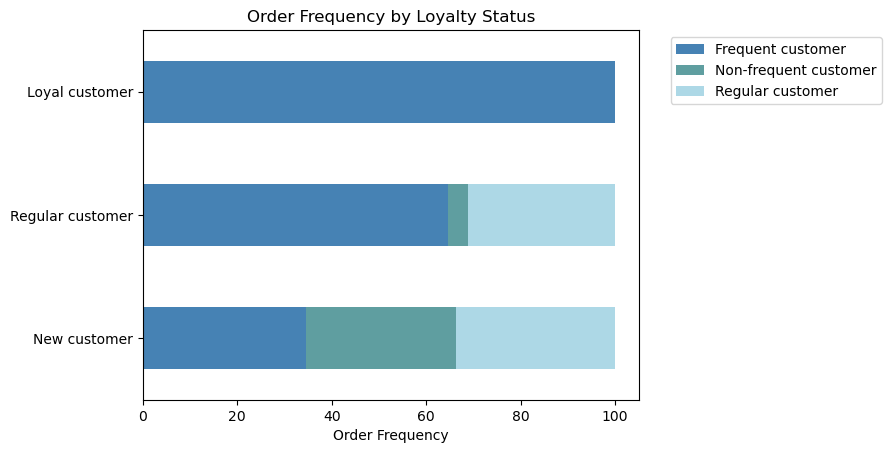

In [44]:
# Create bar chart of crosstab_2_percent
bar_6 = crosstab_2_percent.plot(kind = 'barh', stacked = True, color = ['steelblue', 'cadetblue', 'lightblue'])
plt.xlabel('Order Frequency')
plt.ylabel('')
plt.title('Order Frequency by Loyalty Status')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc = 'upper left', ncol = 1)

In [45]:
# Save 'bar_6' object to file
bar_6.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barh_loyalty_order_frequency_percent.png'))

6. Comparing ordering frequency by age category

In [46]:
# Create crosstab between 'age' and 'order_frequency_flag' columns
crosstab_3 = pd.crosstab(df_ords_prods_all['age_range'], df_ords_prods_all['order_frequency_flag'], dropna = False)

In [47]:
# Sort crosstab_3 by 'Frequent customer'
crosstab_3 = crosstab_3.sort_values(by = 'Frequent customer',ascending = False)

In [48]:
# Print sorted crosstab_3 
crosstab_3

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
age_range,,,
Young adult,5902882,583439,1755974
Older adult,5895127,574400,1726017
Early middle-age adult,5242718,517795,1545481
Late middle-age adult,5168177,511783,1540771


In [49]:
# Sort crosstab_3 by 'Frequent customer'
crosstab_3 = crosstab_3.sort_values(by = 'Frequent customer',ascending = True)

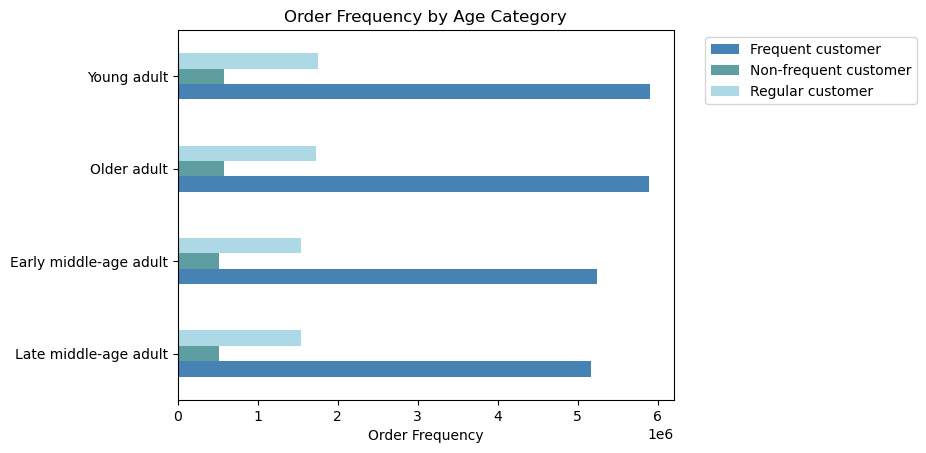

In [50]:
# Create bar chart of crosstab_2
bar_7 = crosstab_3.plot(kind = 'barh', color = ['steelblue', 'cadetblue', 'lightblue'])
plt.xlabel('Order Frequency')
plt.ylabel('')
plt.title('Order Frequency by Age Category')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc = 'upper left', ncol = 1)

In [51]:
# Save 'bar_7' object to file
bar_7.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barh_age_order_frequency.png'))

In [52]:
# Create percentage crosstab between 'age' and 'order_frequency_flag'
crosstab_3_percent = pd.crosstab(df_ords_prods_all['age_range'], df_ords_prods_all['order_frequency_flag'], normalize = 'index', dropna = False).round(4)*100

In [53]:
# Sort crosstab_3 by 'Frequent customer'
crosstab_3_percent = crosstab_3_percent.sort_values(by = 'Frequent customer',ascending = False)

In [54]:
# Print sorted crosstab_3_percent 
crosstab_3_percent

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
age_range,,,
Older adult,71.93,7.01,21.06
Early middle-age adult,71.76,7.09,21.15
Young adult,71.62,7.08,21.30
Late middle-age adult,71.57,7.09,21.34


7. Comparing ordering frequency by family status and family size

In [55]:
# Create crosstab between 'fam_status' and 'order_frequency_flag' columns
crosstab_4 = pd.crosstab(df_ords_prods_all['fam_status'], df_ords_prods_all['order_frequency_flag'], dropna = False)

In [56]:
# Sort crosstab_4 by 'Frequent customer'
crosstab_4 = crosstab_4.sort_values(by = 'Frequent customer',ascending = False)

In [57]:
# Print sorted crosstab_4 
crosstab_4

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
fam_status,,,
married,15587491,1543064,4613156
single,3640038,355311,1099061
divorced/widowed,1904044,184799,556428
living with parents and siblings,1077331,104243,299598


In [58]:
# Sort crosstab_4 by 'Frequent customer'
crosstab_4 = crosstab_4.sort_values(by = 'Frequent customer',ascending = True)

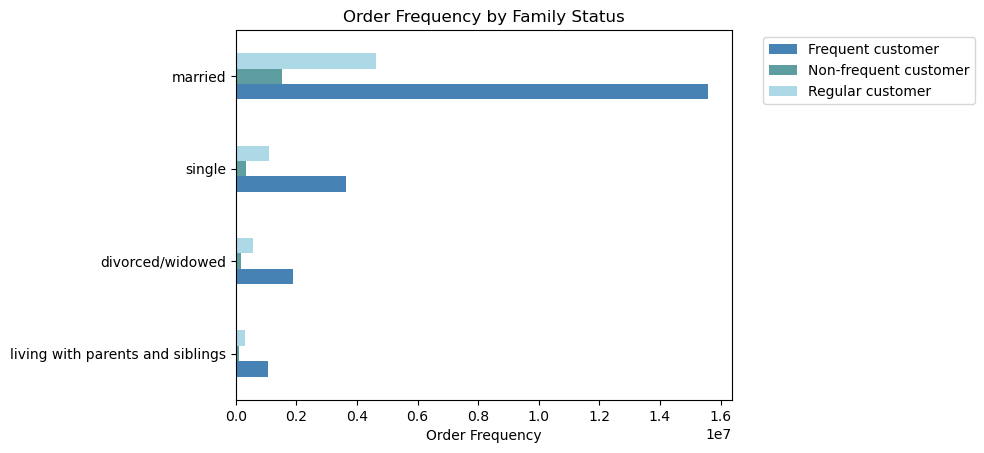

In [59]:
# Create bar chart of crosstab_4
bar_8 = crosstab_4.plot(kind = 'barh', color = ['steelblue', 'cadetblue', 'lightblue'])
plt.xlabel('Order Frequency')
plt.ylabel('')
plt.title('Order Frequency by Family Status')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc = 'upper left', ncol = 1)

In [60]:
# Save 'bar_8' object to file
bar_8.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barh_fam_status_order_frequency.png'))

In [61]:
# Create percentage crosstab between 'fam_status' and 'order_frequency_flag'
crosstab_4_percent = pd.crosstab(df_ords_prods_all['fam_status'], df_ords_prods_all['order_frequency_flag'], normalize = 'index', dropna = False).round(4)*100

In [62]:
# Sort crosstab_4_percent by 'Frequent customer'
crosstab_4_percent = crosstab_4_percent.sort_values(by = 'Frequent customer',ascending = False)

In [63]:
# Print sorted crosstab_4_percent 
crosstab_4_percent

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
fam_status,,,
living with parents and siblings,72.74,7.04,20.23
divorced/widowed,71.98,6.99,21.03
married,71.69,7.10,21.22
single,71.45,6.97,21.57


In [64]:
# Create crosstab between 'family_size' and 'order_frequency_flag' columns
crosstab_5 = pd.crosstab(df_ords_prods_all['family_size'], df_ords_prods_all['order_frequency_flag'], dropna = False)

In [65]:
# Sort crosstab_5 by 'Frequent customer'
crosstab_5 = crosstab_5.sort_values(by = 'Frequent customer',ascending = False)

In [66]:
# Print sorted crosstab_5 
crosstab_5

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
family_size,,,
Large family,5563476,549325,1659715
Medium family,5555864,546824,1630573
Small family,5545482,551158,1622466
Single adult,5544082,540110,1655489


In [67]:
# Sort crosstab_5 by 'Frequent customer'
crosstab_5 = crosstab_5.sort_values(by = 'Frequent customer',ascending = True)

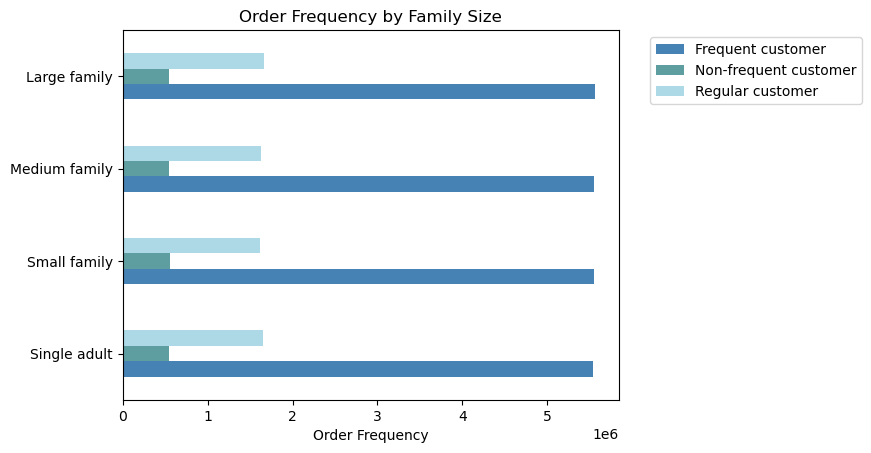

In [70]:
# Create bar chart of crosstab_5
bar_9 = crosstab_5.plot(kind = 'barh', color = ['steelblue', 'cadetblue', 'lightblue'])
plt.xlabel('Order Frequency')
plt.ylabel('')
plt.title('Order Frequency by Family Size')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc = 'upper left', ncol = 1)

In [71]:
# Save 'bar_9' object to file
bar_9.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barh_fam_size_order_frequency.png'))

In [72]:
# Create percentage crosstab between 'family_size' and 'order_frequency_flag'
crosstab_5_percent = pd.crosstab(df_ords_prods_all['family_size'], df_ords_prods_all['order_frequency_flag'], normalize = 'index', dropna = False).round(4)*100

In [73]:
# Sort crosstab_5_percent by 'Frequent customer'
crosstab_5_percent = crosstab_5_percent.sort_values(by = 'Frequent customer',ascending = False)

In [74]:
# Print sorted crosstab_5_percent 
crosstab_5_percent

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
family_size,,,
Medium family,71.84,7.07,21.09
Small family,71.84,7.14,21.02
Single adult,71.63,6.98,21.39
Large family,71.58,7.07,21.35


8. Comparing spending by age category

In [75]:
# Create crosstab between 'age_range' and 'spending_flag' columns
crosstab_6 = pd.crosstab(df_ords_prods_all['age_range'], df_ords_prods_all['spending_flag'], dropna = False)

In [76]:
# Sort crosstab_6 by 'High spender'
crosstab_6 = crosstab_6.sort_values(by = 'High spender',ascending = False)

In [77]:
# Print sorted crosstab_6
crosstab_6

spending_flag,High spender,Low spender
age_range,,
Early middle-age adult,159693,7146301
Older adult,156886,8038658
Young adult,149511,8092784
Late middle-age adult,137335,7083396


In [78]:
# Sort crosstab_6 by 'High spender'
crosstab_6 = crosstab_6.sort_values(by = 'High spender',ascending = True)

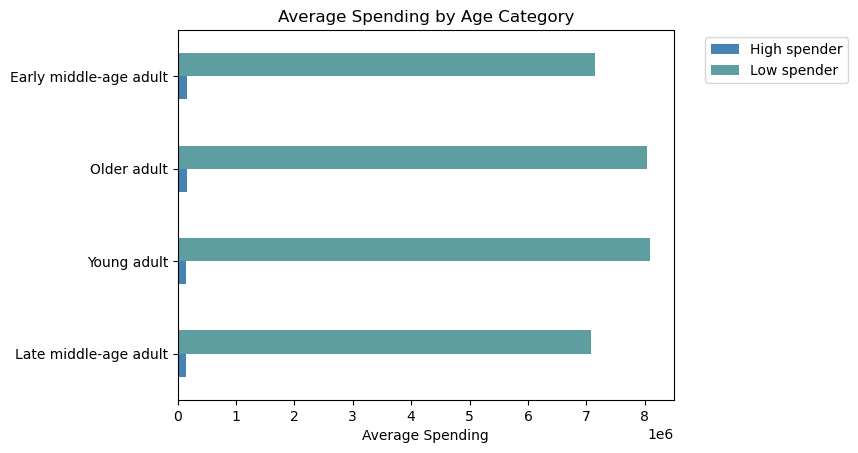

In [81]:
# Create bar chart of crosstab_6
bar_10 = crosstab_6.plot(kind = 'barh', color = ['steelblue', 'cadetblue'])
plt.xlabel('Average Spending')
plt.ylabel('')
plt.title('Average Spending by Age Category')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc = 'upper left', ncol = 1)

In [82]:
# Save 'bar_10' object to file
bar_10.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barh_age_spending.png'))

In [83]:
# Create percentage crosstab between 'age_range' and 'spending_flag'
crosstab_6_percent = pd.crosstab(df_ords_prods_all['age_range'], df_ords_prods_all['spending_flag'], normalize = 'index', dropna = False).round(4)*100

In [84]:
# Sort crosstab_6_percent by 'High Spender'
crosstab_6_percent = crosstab_6_percent.sort_values(by = 'High spender',ascending = False)

In [85]:
# Print sorted crosstab_6_percent 
crosstab_6_percent

spending_flag,High spender,Low spender
age_range,,
Early middle-age adult,2.19,97.81
Older adult,1.91,98.09
Late middle-age adult,1.90,98.10
Young adult,1.81,98.19


9. Comparing spending by family status and family size

In [86]:
# Create crosstab between 'fam_status' and 'spending_flag' columns
crosstab_7 = pd.crosstab(df_ords_prods_all['fam_status'], df_ords_prods_all['spending_flag'], dropna = False)

In [87]:
# Sort crosstab_7 by 'High spender'
crosstab_7 = crosstab_7.sort_values(by = 'High spender',ascending = False)

In [88]:
# Print sorted crosstab_7
crosstab_7

spending_flag,High spender,Low spender
fam_status,,
married,429457,21314254
single,95721,4998689
divorced/widowed,50321,2594950
living with parents and siblings,27926,1453246


In [89]:
# Sort crosstab_7 by 'High spender'
crosstab_7 = crosstab_7.sort_values(by = 'High spender',ascending = True)

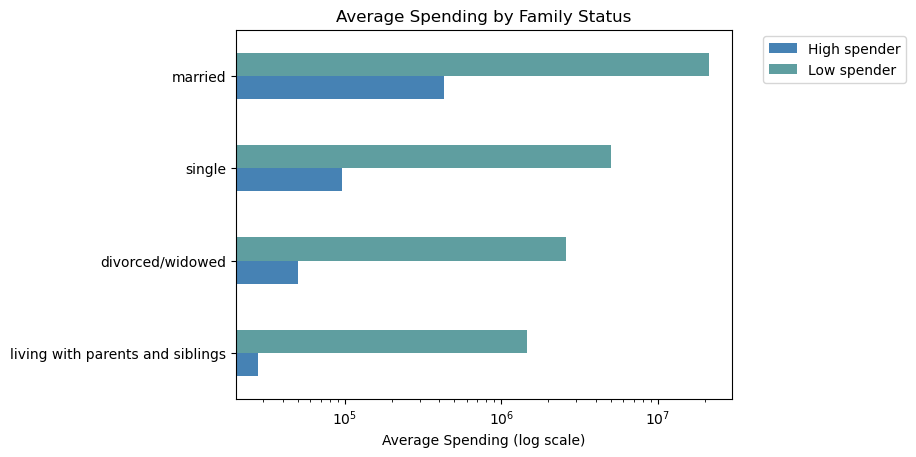

In [90]:
# Create bar chart of crosstab_7
bar_11 = crosstab_7.plot(kind = 'barh', logx = True, color = ['steelblue', 'cadetblue'])
plt.xlabel('Average Spending (log scale)')
plt.ylabel('')
plt.title('Average Spending by Family Status')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc = 'upper left', ncol = 1)

In [91]:
# Save 'bar_11' object to file
bar_11.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barh_fam_status_spending.png'))

In [92]:
# Create percentage crosstab between 'fam_status' and 'spending_flag'
crosstab_7_percent = pd.crosstab(df_ords_prods_all['fam_status'], df_ords_prods_all['spending_flag'], normalize = 'index', dropna = False).round(4)*100

In [93]:
# Sort crosstab_7_percent by 'High Spender'
crosstab_7_percent = crosstab_7_percent.sort_values(by = 'High spender',ascending = False)

In [94]:
# Print sorted crosstab_7_percent 
crosstab_7_percent

spending_flag,High spender,Low spender
fam_status,,
married,1.98,98.02
divorced/widowed,1.90,98.10
living with parents and siblings,1.89,98.11
single,1.88,98.12


In [95]:
# Create crosstab between 'family_size' and 'spending_flag' columns
crosstab_8 = pd.crosstab(df_ords_prods_all['family_size'], df_ords_prods_all['spending_flag'], dropna = False)

In [96]:
# Sort crosstab_8 by 'High spender'
crosstab_8 = crosstab_8.sort_values(by = 'High spender',ascending = False)

In [97]:
# Print sorted crosstab_8
crosstab_8

spending_flag,High spender,Low spender
family_size,,
Medium family,161059,7572202
Large family,152666,7619850
Single adult,146042,7593639
Small family,143658,7575448


In [98]:
# Sort crosstab_8 by 'High spender'
crosstab_8 = crosstab_8.sort_values(by = 'High spender',ascending = True)

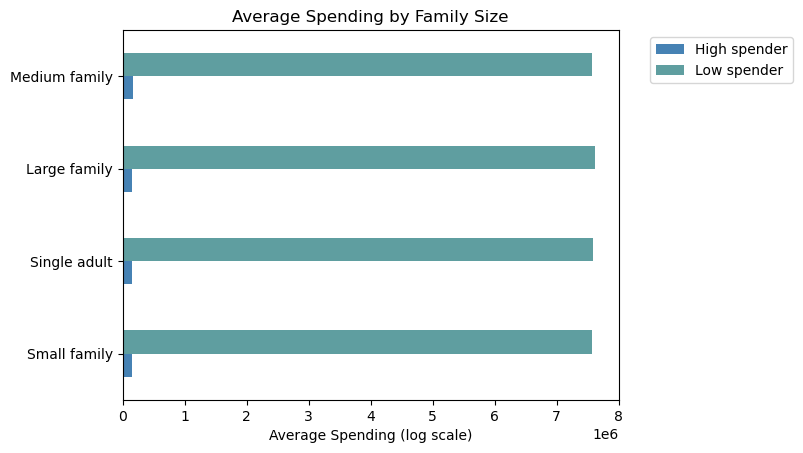

In [101]:
# Create bar chart of crosstab_8
bar_12 = crosstab_8.plot(kind = 'barh', color = ['steelblue', 'cadetblue'])
plt.xlabel('Average Spending (log scale)')
plt.ylabel('')
plt.title('Average Spending by Family Size')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc = 'upper left', ncol = 1)

In [102]:
# Save 'bar_12' object to file
bar_12.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barh_fam_size_spending.png'))

In [103]:
# Create percentage crosstab between 'family_size' and 'spending_flag'
crosstab_8_percent = pd.crosstab(df_ords_prods_all['family_size'], df_ords_prods_all['spending_flag'], normalize = 'index', dropna = False).round(4)*100

In [104]:
# Sort crosstab_8_percent by 'High Spender'
crosstab_8_percent = crosstab_8_percent.sort_values(by = 'High spender',ascending = False)

In [105]:
# Print sorted crosstab_8_percent 
crosstab_8_percent

spending_flag,High spender,Low spender
family_size,,
Medium family,2.08,97.92
Large family,1.96,98.04
Single adult,1.89,98.11
Small family,1.86,98.14


10. Comparing order frequency by income range with crosstabs and bar charts

In [106]:
# Create crosstab between 'income_range' and 'order_frequency_flag' columns
crosstab_9 = pd.crosstab(df_ords_prods_all['income_range'], df_ords_prods_all['order_frequency_flag'], dropna = False)

In [107]:
# Sort crosstab_9 by 'Frequent customer'
crosstab_9 = crosstab_9.sort_values(by = 'Frequent customer',ascending = False)

In [108]:
# Print sorted crosstab_9
crosstab_9

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
income_range,,,
Below average income,11957387,1222758,3577017
Above average income,10059628,953228,2940404
High income,116844,8269,29000
Very high income,75045,3162,21822


In [109]:
# Sort crosstab_9 by 'Frequent customer'
crosstab_9 = crosstab_9.sort_values(by = 'Frequent customer',ascending = True)

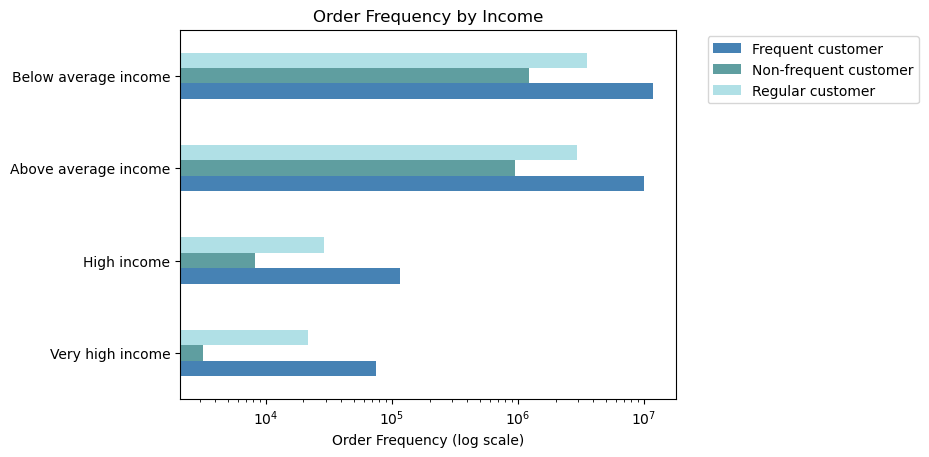

In [115]:
# Create bar chart of crosstab_9
bar_13 = crosstab_9.plot(kind = 'barh', logx = True, color = ['steelblue', 'cadetblue','powderblue'])
plt.xlabel('Order Frequency (log scale)')
plt.ylabel('')
plt.title('Order Frequency by Income')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc = 'upper left', ncol = 1)

In [116]:
# Save 'bar_13' object to file
bar_13.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barh_income_order_frequency.png'))

In [117]:
# Create percentage crosstab between 'income_range' and 'order_frequency_flag'
crosstab_9_percent = pd.crosstab(df_ords_prods_all['income_range'], df_ords_prods_all['order_frequency_flag'], normalize = 'index', dropna = False).round(4)*100

In [118]:
# Sort crosstab_9_percent by 'Frequent customer'
crosstab_9_percent = crosstab_9_percent.sort_values(by = 'Frequent customer',ascending = False)

In [119]:
# Print sorted crosstab_9_percent 
crosstab_9_percent

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
income_range,,,
High income,75.82,5.37,18.82
Very high income,75.02,3.16,21.82
Above average income,72.10,6.83,21.07
Below average income,71.36,7.30,21.35


11. Comparing average spending by income range with crosstabs and bar charts

In [120]:
# Create crosstab between 'income_range' and 'spending_flag' columns
crosstab_10 = pd.crosstab(df_ords_prods_all['income_range'], df_ords_prods_all['spending_flag'], dropna = False)

In [121]:
# Sort crosstab_10 by 'High spender'
crosstab_10 = crosstab_10.sort_values(by = 'High spender',ascending = False)

In [122]:
# Print sorted crosstab_10
crosstab_10

spending_flag,High spender,Low spender
income_range,,
Above average income,269713,13683547
High income,154113,0
Very high income,100029,0
Below average income,79570,16677592


In [123]:
# Sort crosstab_10 by 'High spender'
crosstab_10 = crosstab_10.sort_values(by = 'High spender',ascending = True)

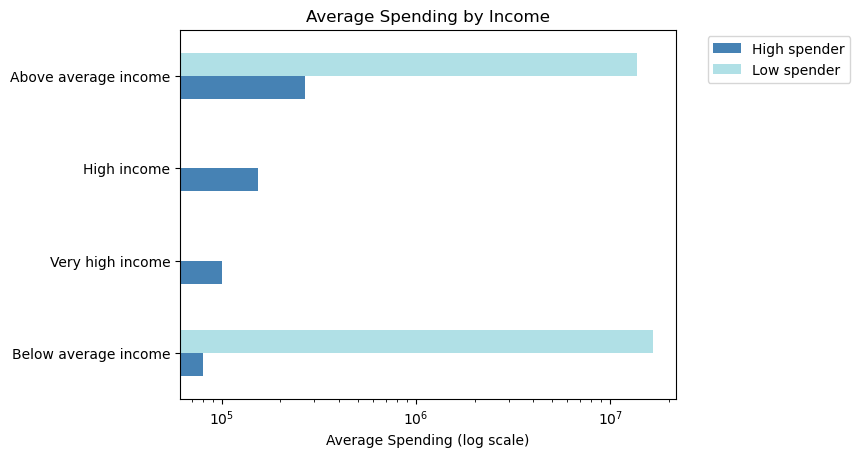

In [124]:
# Create bar chart of crosstab_10
bar_14 = crosstab_10.plot(kind = 'barh', logx = True, color = ['steelblue', 'powderblue'])
plt.xlabel('Average Spending (log scale)')
plt.ylabel('')
plt.title('Average Spending by Income')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc = 'upper left', ncol = 1)

In [113]:
# Save 'bar_14' object to file
bar_14.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barh_income_spending.png'))

In [114]:
# Create percentage crosstab between 'income_range' and 'spending_flag'
crosstab_10_percent = pd.crosstab(df_ords_prods_all['income_range'], df_ords_prods_all['spending_flag'], normalize = 'index', dropna = False).round(4)*100

In [115]:
# Sort crosstab_10_percent by 'High Spender'
crosstab_10_percent = crosstab_10_percent.sort_values(by = 'High spender',ascending = False)

In [116]:
# Print sorted crosstab_8_percent 
crosstab_10_percent

spending_flag,High spender,Low spender
income_range,,
High income,100.00,0.00
Very high income,100.00,0.00
Above average income,1.93,98.07
Below average income,0.47,99.53
